# Ensembles - RE

In [1]:
import os, sys
path = os.getcwd()+"/../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt

params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)

%matplotlib inline

#Ensembler
from ensembler.integrator.stochastic import metropolisMonteCarloIntegrator, langevinIntegrator
from ensembler.integrator.newtonian import positionVerletIntegrator
from ensembler.potentials.OneD import harmonicOscillator, envelopedPotential
#from ensembler.integrator.newtonian import positionVerletIntegrator
from ensembler.system.basic_system import system as basic_system
from ensembler.system.eds_system import edsSystem

c:\Users\benja\OneDrive - ETH Zürich\PhD\Code\ensembler_public\examples\dev


# Simulated Tempering

Sugita, Okinamura?

## Basic Definitions

In [2]:
#Potential:
potential = harmonicOscillator()
#Integrator
integrator =positionVerletIntegrator()# langevinIntegrator()

system = basic_system(integrator=integrator, potential=potential, position=5)

#Ensemble
from ensembler.ensemble import replica_exchange

trials = 10
steps_between_trials = 50
temperature_range = np.linspace(298, 550, 4)

simulated_tempering = replica_exchange.TemperatureReplicaExchange(system=system, temperature_Range=temperature_range, steps_between_trials=steps_between_trials)
simulated_tempering.replicas

{0: <ensembler.system.basic_system.system at 0x1588b878308>,
 1: <ensembler.system.basic_system.system at 0x1588f3fab08>,
 2: <ensembler.system.basic_system.system at 0x1588f411808>,
 3: <ensembler.system.basic_system.system at 0x1588f413e88>}

# Simulate

In [3]:
reps = simulated_tempering.replicas

for repID, replica in reps.items():
    print(repID)
    replica.simulate(100, withdrawTraj=True)
print(vars(replica))

0



1



2



3



{'temperature': 550.0, 'mass': 1, 'nparticles': 1, 'nDim': 1, 'nStates': 1, 'currentState': State(position=-3.0767286321409872, temperature=298.0, totEnergy=15809.00741769066, totPotEnergy=4.733129537918075, totKinEnergy=15804.274288152743, dhdpos=-2.987834666406094, velocity=-177.78793146978646), 'trajectory':      position  temperature     totEnergy  totPotEnergy  totKinEnergy  \
0    5.000000        298.0     12.700890     12.500000      0.200890   
1    4.999029        298.0     14.380576     12.495146      1.885430   
2    4.995559        298.0     36.565845     12.477803     24.088042   
3    4.989590        298.0     83.687521     12.448006     71.239514   
4    4.981127        298.0    155.651371     12.405815    143.245556   
..        ...          ...           ...           ...           ...   
96  -2.712371        298.0  17900.332395      3.678478  17896.653917   
97  -2.805610        298.0  17391.111456      3.935724  17387.175732   
98  -2.897447        298.0  16872.1221

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,5.000000,298.0,12.700890,12.500000,0.200890,5.000000,-3.188935
1,4.995906,298.0,46.008864,12.479536,33.529328,5.000000,-8.188935
2,4.989313,298.0,99.366632,12.446623,86.920010,4.995906,-13.184841
3,4.980226,298.0,177.551256,12.401326,165.149930,4.989313,-18.174154
4,4.968649,298.0,280.406385,12.343736,268.062649,4.980226,-23.154380


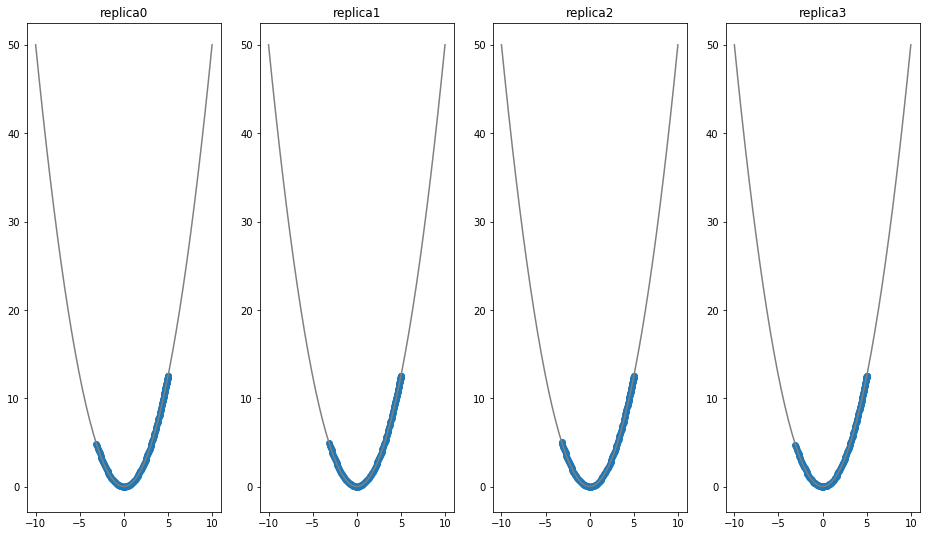

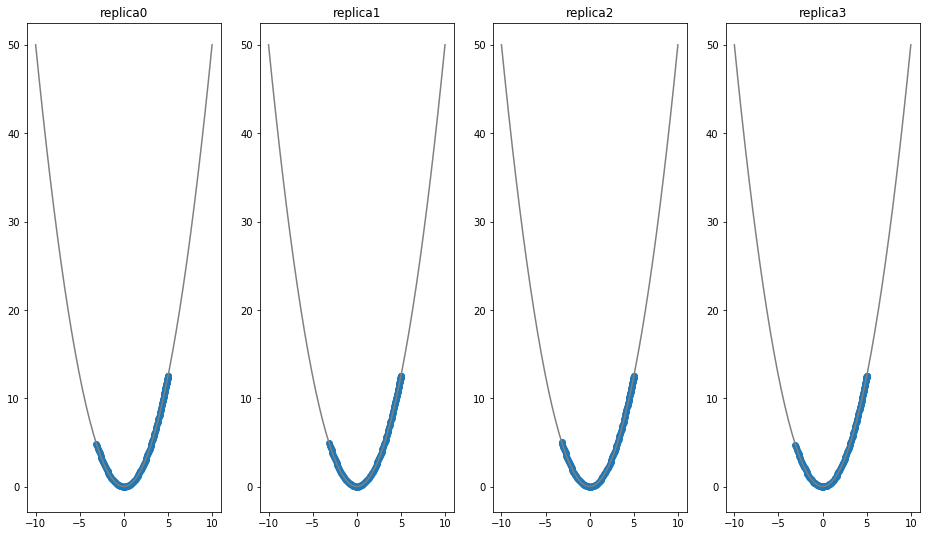

In [4]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, simulated_tempering.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totPotEnergy)
    min_e = min(trajs[traj].totEnergy)
    #ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))

trajs[3].head()
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, simulated_tempering.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totPotEnergy)
    min_e = min(trajs[traj].totEnergy)
    #ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))

trajs[2].head()


In [5]:
simulated_tempering.simulate(trials, reset_ensemble=True)
#ensemble.exchange_information

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,-6.172138,550.0,19.516458,19.047641,0.468818,-6.172138,0.968316
1,-6.168567,550.0,44.518647,19.025611,25.493035,-6.172138,7.140453
2,-6.161913,550.0,107.549597,18.984585,88.565012,-6.168567,13.309020
3,-6.152177,550.0,208.483263,18.924643,189.558620,-6.161913,19.470933
4,-6.139366,550.0,347.117802,18.845906,328.271896,-6.152177,25.623111


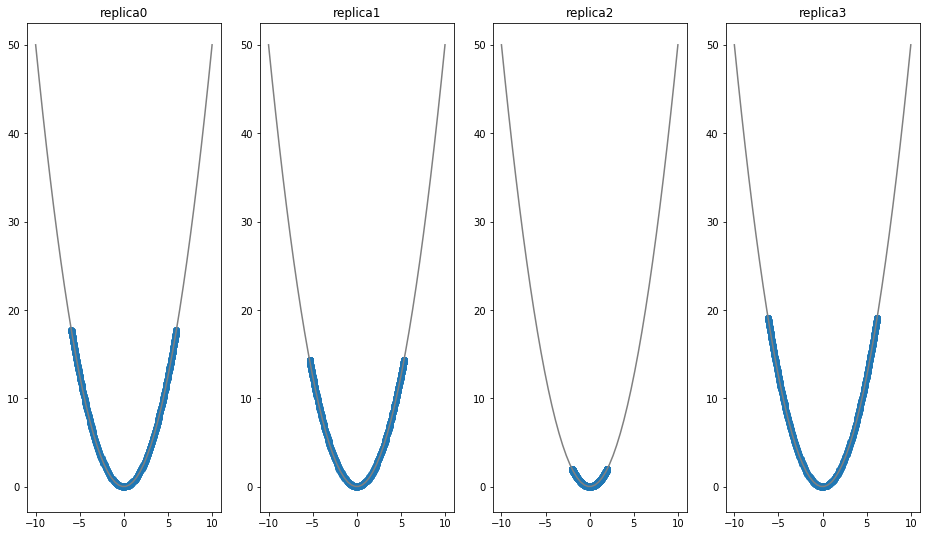

In [6]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, simulated_tempering.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totPotEnergy)
    min_e = min(trajs[traj].totEnergy)
    #ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))

trajs[3].head()


In [7]:
trajs[3].head()


,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,-6.172138,550.0,19.516458,19.047641,0.468818,-6.172138,0.968316
1,-6.168567,550.0,44.518647,19.025611,25.493035,-6.172138,7.140453
2,-6.161913,550.0,107.549597,18.984585,88.565012,-6.168567,13.309020
3,-6.152177,550.0,208.483263,18.924643,189.558620,-6.161913,19.470933
4,-6.139366,550.0,347.117802,18.845906,328.271896,-6.152177,25.623111


In [8]:
simulated_tempering.replicas[0]

In [9]:
simulated_tempering.exchange_information

,nExchange,replicaID,replicaPositionI,exchangeCoordinateI,TotEI,replicaPositionJ,exchangeCoordinateJ,TotEJ,doExchange
0,0,0,0,{'temperature': 298.0},17.673002,0,{'temperature': 298.0},17.673002,False
1,0,1,1,{'temperature': 382.0},14.315329,1,{'temperature': 382.0},14.315329,False
2,0,2,2,{'temperature': 466.0},2.001336,2,{'temperature': 466.0},2.001336,False
3,0,3,3,{'temperature': 550.0},19.047641,3,{'temperature': 550.0},19.047641,False
4,1,1,0,{'temperature': 298.0},28523.904933,1,{'temperature': 382.0},23181.002176,True
5,1,0,1,{'temperature': 382.0},28523.904933,0,{'temperature': 298.0},23181.002176,True
6,1,3,2,{'temperature': 466.0},3143.152262,3,{'temperature': 550.0},30920.864859,True
7,1,2,3,{'temperature': 550.0},3143.152262,2,{'temperature': 466.0},30920.864859,True
8,1,2,3,{'temperature': 550.0},3143.152262,3,{'temperature': 550.0},3143.152262,False
9,2,1,0,{'temperature': 298.0},21964.495447,0,{'temperature': 298.0},21964.495447,False


# Visualisation

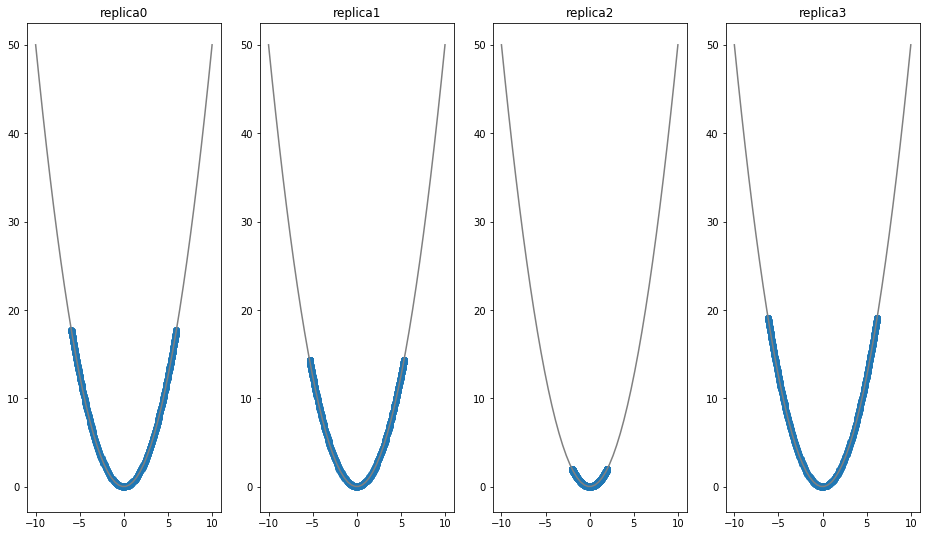

In [10]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, simulated_tempering.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totPotEnergy)
    min_e = min(trajs[traj].totEnergy)
    #ax.set_ylim([min_e,min_e+5])
    ax.set_title("replica"+str(traj))


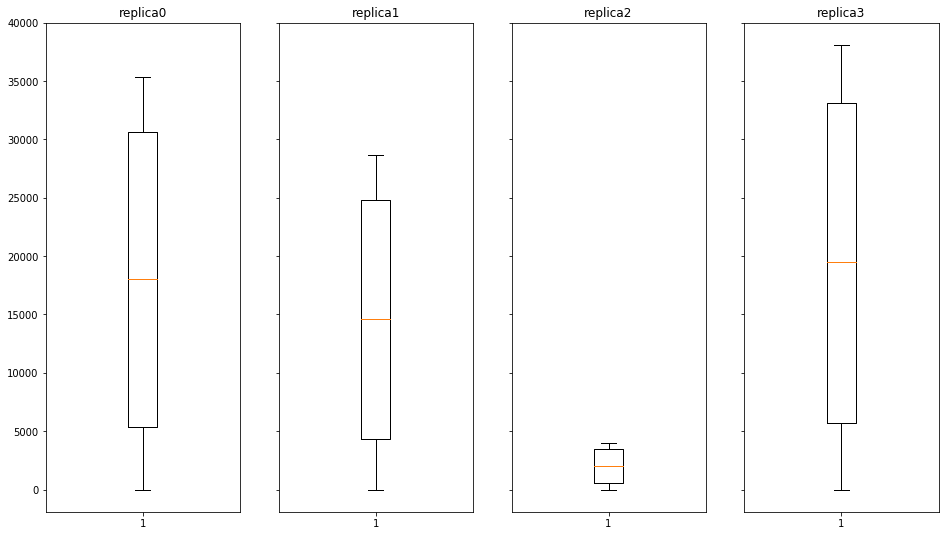

In [11]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9], sharey=True)

for traj, ax in zip(trajs, axes):
    ax.boxplot(trajs[traj].totKinEnergy)
    min_e = min(trajs[traj].totEnergy)
    ax.set_title("replica"+str(traj))


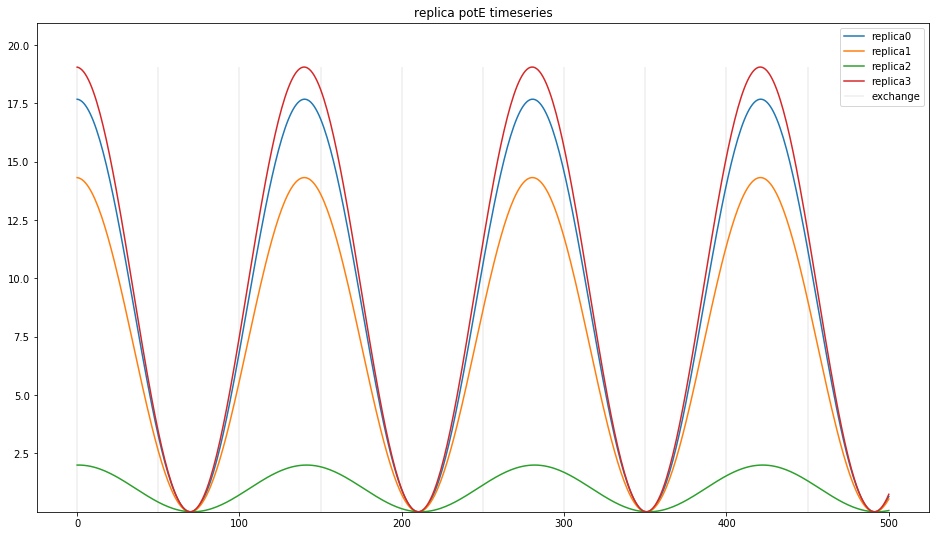

In [15]:

fig, ax = plt.subplots(ncols=1, figsize=[16,9])
enes = [trajs[x].totPotEnergy	for x in sorted(trajs)] 
min_e = np.min(enes)
max_e = np.max(enes)
trials = 10
for ind, ene in enumerate(enes):
    ax.plot(ene, label="replica"+str(ind))
ax.vlines([steps_between_trials*x for x in range(trials)], ymin=min_e, ymax=max_e, label="exchange", lw=0.1)
ax.set_title("replica potE timeseries")
ax.set_ylim(1.1*min_e, 1.1*max_e)
ax.legend()

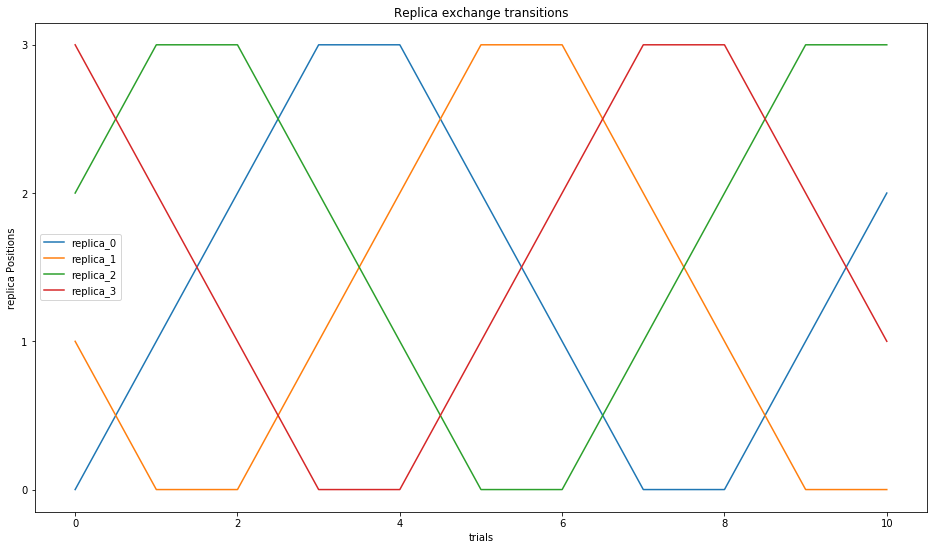

In [16]:
stats= simulated_tempering.exchange_information
replicas = np.unique(simulated_tempering.exchange_information.replicaID)
trials = np.unique(simulated_tempering.exchange_information.nExchange)

import itertools as it

fig, ax = plt.subplots(ncols=1, figsize=[16,9])

replica_positions = {}
for replica in replicas:
    replica_positions.update({replica: stats.loc[stats.replicaID==replica].replicaPositionI})

    x = trials
    y = replica_positions[replica]

    ax.plot(x,y , label="replica_"+str(replica))

#plt.yticks(replicas+1, reversed(replicas+1))
ax.set_yticks(ticks=replicas)
ax.set_yticklabels(labels=replicas)

ax.set_ylabel("replica Positions")
ax.set_xlabel("trials")
ax.set_title("Replica exchange transitions")
if(len(replicas)<10): plt.legend()

# Hamiltonian Replica Exchange

## RE-EDS

Replica Exchange - Enveloping Distribution Sampling (RE-EDS) is a combined Method, that efficiently can calculate free energy differences between mutliple end-states

In [26]:
import os, sys
path = os.getcwd()+"/../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt

params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)

%matplotlib inline

#Ensembler
from ensembler.potentials.OneD import harmonicOscillator, envelopedPotential as envelopedPotential
from ensembler.integrator.newtonian import positionVerletIntegrator
from ensembler.integrator.stochastic import metropolisMonteCarloIntegrator
from ensembler.system.basic_system import system as systems
from ensembler.system.eds_system import edsSystem

c:\Users\benja\OneDrive - ETH Zürich\PhD\Code\ensembler_public\examples\dev


In [30]:
#BUILD
##Ensemble Settings:
s_values = np.logspace(start=0, stop=-0.5, num=4)
trials=20
steps_between_trials=10#0

##Potential:
pot_diff= 0
space_shift=4
k1 = k2 = 1
potentialA = harmonicOscillator(k=k1)
potentialB = harmonicOscillator(k=k2, x_shift=space_shift, y_shift=pot_diff)
potential = envelopedPotential(V_is=[potentialA, potentialB])

###plot Potential
pos = np.linspace(-10,10,100)
for s in s_values:
    potential.s=s
    ene = potential.ene(pos)
    plt.plot(pos, ene)
plt.ylim([min(ene), min(ene)+10])
###plot Potential
pos = np.linspace(-10,10,100)
for s in s_values:
    potential.s=s
    ene = potential.ene(pos)
    plt.plot(pos, ene)
plt.ylim([min(ene), min(ene)+10])


##Integrator
integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=1)

##System
eds_system = edsSystem(integrator=integrator, potential=potential, position=5)


##Ensemble
from ensembler.ensemble import replica_exchange
ensemble = replica_exchange.ReplicaExchangeEnvelopingDistributionSampling(system=eds_system, exchange_criterium=None, s_range=s_values, steps_between_trials=steps_between_trials)

[replica.s for repID, replica in ensemble.replicas.items()]

TypeError: 'NoneType' object cannot be interpreted as an integer

In [19]:
reps = ensemble.replicas

for repID, replica in reps.items():
    print(repID)
    replica.simulate(1000, withdrawTraj=True)
    

NameError: name 'ensemble' is not defined

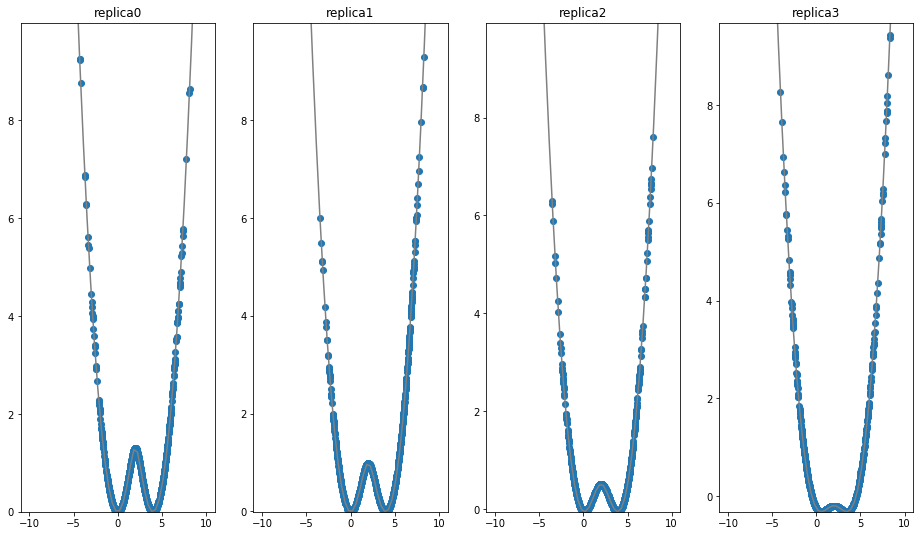

In [4]:
trajs = ensemble.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, ensemble.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totEnergy)
    min_e = min(trajs[traj].totEnergy)
    ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))


In [5]:
ensemble.simulate(trials, reset_ensemble=True)

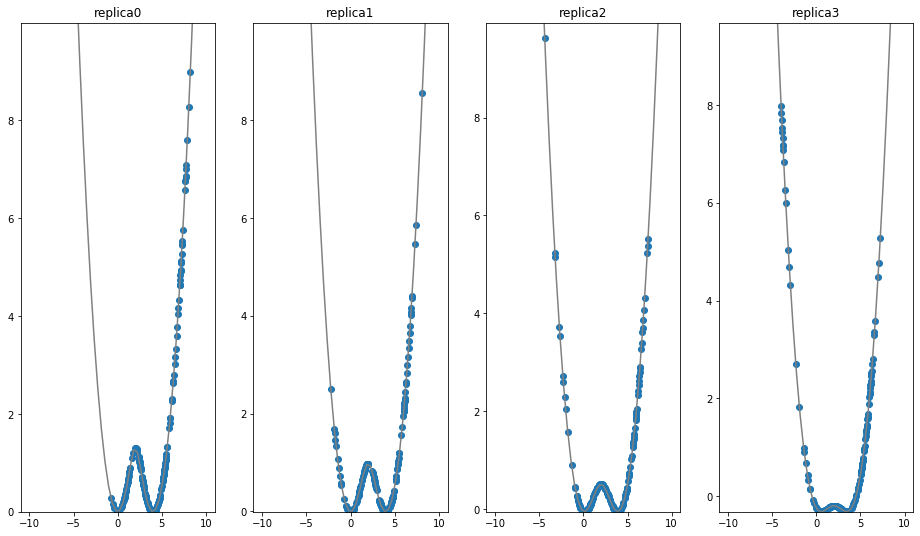

In [6]:
trajs = ensemble.get_trajectories()
equilib = 10
positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, ensemble.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position[equilib:], trajs[traj].totEnergy[equilib:])
    min_e = min(trajs[traj].totEnergy)
    ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))


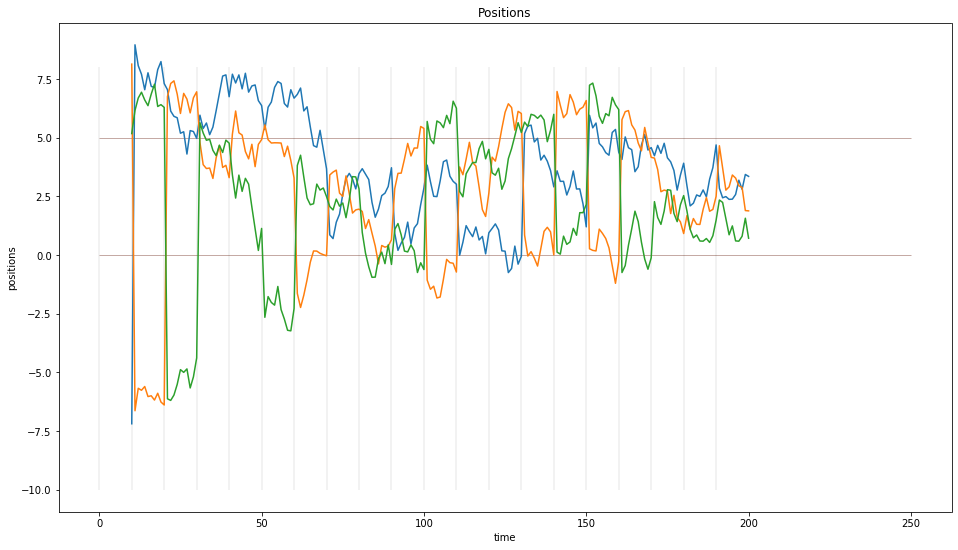

In [7]:
plt.figure(figsize=[16,9])
plt.plot(trajs[0].position[equilib:])
plt.plot(trajs[1].position[equilib:])
plt.plot(trajs[2].position[equilib:])

plt.vlines([steps_between_trials*x for x in range(20)], ymin=8, ymax=-10, label="exchange", lw=0.1)
plt.hlines(5, xmin=0,xmax=250, lw=0.5, color="C5", zorder=-1)
plt.hlines(0, xmin=0,xmax=250, lw=0.5, color="C5", zorder=-1)

plt.title("Positions")
plt.ylabel("positions")
plt.xlabel("time")

pass

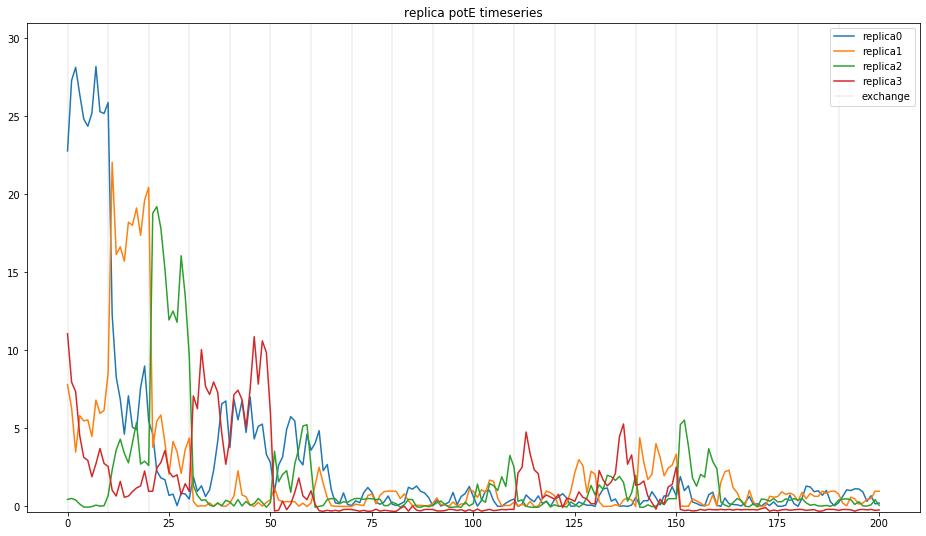

In [8]:
trials=20

fig, ax = plt.subplots(ncols=1, figsize=[16,9])
enes = [trajs[x].totEnergy for x in sorted(trajs)] 
min_e = np.min(enes)
max_e = np.max(enes)

ax.vlines([steps_between_trials*x for x in range(trials)], ymin=1.1*min_e, ymax=1.1*max_e, label="exchange", lw=0.1)

for ind, ene in enumerate(enes):
    ax.plot(ene, label="replica"+str(ind))
ax.set_title("replica potE timeseries")
ax.set_ylim(1.1*min_e, 1.1*max_e)
ax.legend()

[0 1 2 3]


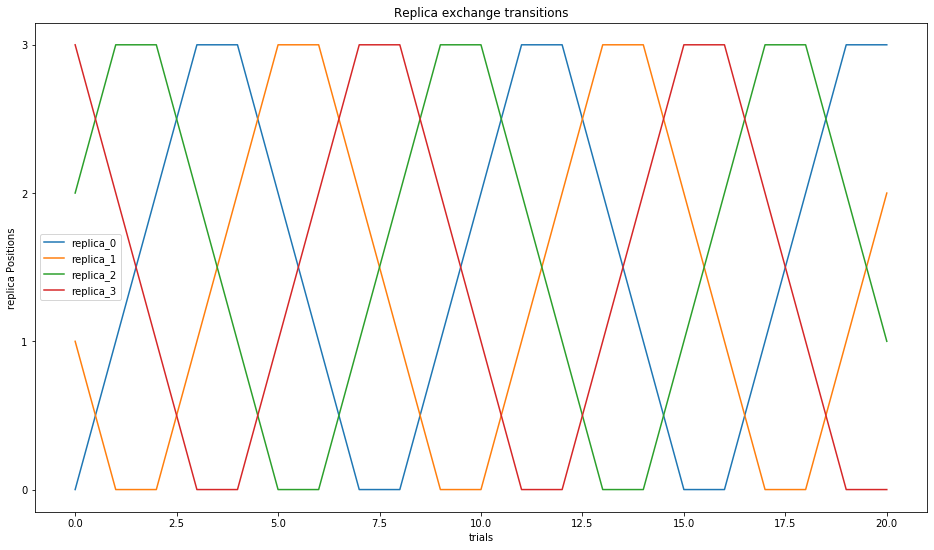

In [9]:
stats= ensemble.exchange_information
replicas = np.unique(ensemble.exchange_information.replicaID)
trials = np.unique(ensemble.exchange_information.nExchange)

import itertools as it

fig, ax = plt.subplots(ncols=1, figsize=[16,9])

replica_positions = {}
for replica in replicas:
    replica_positions.update({replica: stats.loc[stats.replicaID==replica].replicaPositionI})

    x = trials
    y = replica_positions[replica]

    ax.plot(x,y , label="replica_"+str(replica))

#plt.yticks(replicas+1, reversed(replicas+1))
print(replicas)
ax.set_yticks(ticks=replicas)
ax.set_yticklabels(labels=replicas)

ax.set_ylabel("replica Positions")
ax.set_xlabel("trials")
ax.set_title("Replica exchange transitions")
if(len(replicas)<10): plt.legend()